In [1]:
import nltk
from nltk.corpus import brown

In [ ]:
s = input('Enter a sentence : ')

In [95]:
sentence = nltk.word_tokenize(s)

In [96]:
input_sent = []
input_sent.append(sentence)
input_sent

[['If',
  'we',
  'did',
  "n't",
  'have',
  'enough',
  'to',
  'worry',
  'about',
  'already',
  'during',
  'this',
  'pandemic',
  ',',
  'parents',
  'now',
  'have',
  'another',
  'dire',
  'warning',
  'from',
  'medical',
  'experts']]

In [97]:
#초기 태그 세팅
brown_sent_tag = brown.tagged_sents(tagset = 'universal')
nltk_sent_tag = nltk.pos_tag(sentence, tagset = 'universal')

In [98]:
brown_sent = brown.sents()
sent_tag = []
sent_tag.append(nltk_sent_tag)

In [99]:
sent_tag

[[('If', 'ADP'),
  ('we', 'PRON'),
  ('did', 'VERB'),
  ("n't", 'ADV'),
  ('have', 'VERB'),
  ('enough', 'ADV'),
  ('to', 'PRT'),
  ('worry', 'VERB'),
  ('about', 'ADP'),
  ('already', 'ADV'),
  ('during', 'ADP'),
  ('this', 'DET'),
  ('pandemic', 'ADJ'),
  (',', '.'),
  ('parents', 'NOUN'),
  ('now', 'ADV'),
  ('have', 'VERB'),
  ('another', 'DET'),
  ('dire', 'NOUN'),
  ('warning', 'NOUN'),
  ('from', 'ADP'),
  ('medical', 'ADJ'),
  ('experts', 'NOUN')]]

In [100]:
# training 할 brownCorpus의 size
brownSize = int(len(brown_sent_tag)*0.9)
print(brownSize)

57340


In [101]:
#training 할 brown 전체 corpus
train_sent = brown_sent_tag[:brownSize]

In [102]:
test_sent= sent_tag
test_sent

[[('If', 'ADP'),
  ('we', 'PRON'),
  ('did', 'VERB'),
  ("n't", 'ADV'),
  ('have', 'VERB'),
  ('enough', 'ADV'),
  ('to', 'PRT'),
  ('worry', 'VERB'),
  ('about', 'ADP'),
  ('already', 'ADV'),
  ('during', 'ADP'),
  ('this', 'DET'),
  ('pandemic', 'ADJ'),
  (',', '.'),
  ('parents', 'NOUN'),
  ('now', 'ADV'),
  ('have', 'VERB'),
  ('another', 'DET'),
  ('dire', 'NOUN'),
  ('warning', 'NOUN'),
  ('from', 'ADP'),
  ('medical', 'ADJ'),
  ('experts', 'NOUN')]]

In [103]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sent, backoff = t0)
t2 = nltk.BigramTagger(train_sent, backoff = t1)

In [104]:
result = t2.tag(input_sent[0])
pos_result1 = list()
for i in range(len(result)):
    pos_result1.append(result[i][1])

In [105]:
print('Enter a sentence : ',s)
print('POS Tagging Result :', pos_result1)
print('Accuracy : ',t2.evaluate(test_sent))

Enter a sentence :  If we didn't have enough to worry about already during this pandemic, parents now have another dire warning from medical experts
POS Tagging Result : ['ADP', 'PRON', 'VERB', 'NN', 'VERB', 'ADJ', 'PRT', 'VERB', 'ADP', 'ADV', 'ADP', 'DET', 'NOUN', '.', 'NOUN', 'ADV', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'ADJ', 'NOUN']
Accuracy :  0.8260869565217391


 ADP VERB NOUN  ADJ  ADV  DET PRON   NN  PRT    . 
   4    4    4    3    2    2    1    1    1    1 


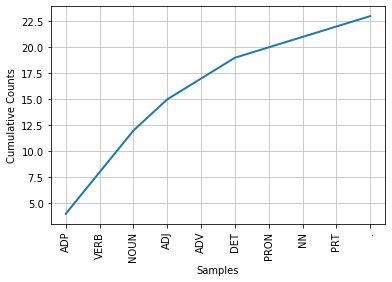

In [106]:
#빈번한 횟수
before_tag_fd = nltk.FreqDist(tag for (word,tag) in result)
before_tag_fd.tabulate()
before_tag_fd.plot(cumulative=True)